In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import random

import matplotlib.pyplot as plt

from sklearn.externals import joblib
import pickle

In [80]:
df = pd.read_csv(
    'ceneval_mentor_v3.csv',
    encoding='utf-8',
    low_memory=False,
    index_col=0
)

In [81]:
#get params
def get_random_params():
    return {
        "criterion": random.choice(['gini','entropy']),
        "max_depth": random.choice(list(range(1, 100, 1)) + [None]),
        "max_features": random.choice(range(50, 100, 5)) / 100,
        "splitter": random.choice(['random', 'best']),
    }

In [82]:
# Create datasets
train = df.sample(frac=0.6)
temp = df.drop(train.index)
test = temp.sample(frac=0.5)
validate = temp.drop(test.index)

In [83]:
# Train data 
x_train = train.drop(["DICTAMEN"], axis=1)
y_train = train['DICTAMEN']

In [84]:
# Test data
x_test = test.drop(["DICTAMEN"], axis=1)
y_test = test['DICTAMEN']


In [85]:
# Validatation data
x_validate = validate.drop(["DICTAMEN"], axis=1)
y_validate = validate['DICTAMEN']

In [86]:
def get_accuracy(x_train, y_train, x_test, y_test, params): 
    print("Getting accuracy for:" + str(params))
    clf=DecisionTreeClassifier(**params)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred), clf

In [87]:
params = []
best_model = None
best_score = -1
for i in range(1000):
    # Create random configuration
    param = get_random_params()
    # Get model and accuracy
    acc, model = get_accuracy(x_train, y_train, x_test, y_test, param)
    param["accuracy"] = acc
    # Save metadata
    params.append(param)
    # Get best model
    if acc > best_score:
      best_score = acc
      best_model = model

Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 96, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 40, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 80, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 18, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 14, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 46, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.5, 'max_depth': 63, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 88, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 73, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0

Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 16, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 49, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 15, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_depth': 3, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 90, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 26, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 33, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 83, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 34, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 70, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.9, 'max_depth': 64, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 48, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 70, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 27, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 68, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 76, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 16, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 51, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 34, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 92, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'max_depth': 3, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 25, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 84, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 73, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 94, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 63, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 24, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'm

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 83, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 98, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 81, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 39, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.55, 'max_depth': 41, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 97, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 24, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 90, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 40, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.7

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 74, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 70, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 9, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'max_depth': 95, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 63, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.7, 'max_depth': 63, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_depth': 79, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 90, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 4, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'max_depth': 79, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 96, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 75, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 34, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 13, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 53, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 41, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 19, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 15, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.75, 'max_depth': 47, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 1, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 64, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 83, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 68, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 72, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 5, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 72, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 27, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'ma

Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 12, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.7, 'max_depth': 86, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 42, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 10, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 91, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 21, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 84, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 29, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 63, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 19, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 76, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_depth': 17, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_depth': 76, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 63, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 60, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.8, 'max_depth': 45, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 95, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.6, 'max_depth': 70, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.

Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.5, 'max_depth': 48, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 16, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.65, 'max_depth': 32, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 77, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.9, 'max_depth': 43, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.8, 'max_depth': 51, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.85, 'max_depth': 90, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.55, 'max_depth': 5, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 63, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_feat

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.85, 'max_depth': 55, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'max_depth': 64, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9, 'max_depth': 1, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 77, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 88, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 39, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.7, 'max_depth': 42, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 12, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 48, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.9,

Getting accuracy for:{'criterion': 'gini', 'max_features': 0.5, 'max_depth': 96, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 12, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'gini', 'max_features': 0.95, 'max_depth': 79, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.7, 'max_depth': 38, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 44, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.5, 'max_depth': 43, 'splitter': 'random'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 92, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.75, 'max_depth': 48, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features': 0.95, 'max_depth': 77, 'splitter': 'best'}
Getting accuracy for:{'criterion': 'entropy', 'max_features'

In [88]:
# Save results as csv
result = pd.DataFrame(params)
result.to_csv("results2.csv", index=False)

In [89]:
# Save model as file
from joblib import dump, load
model_filename = 'best-model-{}.joblib'.format(best_score)
print("Saving model in file: {}".format(model_filename))
dump(best_model, model_filename) 

Saving model in file: best-model-0.6912235746316464.joblib


['best-model-0.6912235746316464.joblib']

In [90]:
# Load model and get test & validation
clf = load(model_filename)
y_estimate_test = clf.predict(x_test)
y_estimate_validate = clf.predict(x_validate)
test_accuracy =  metrics.accuracy_score(y_test, y_estimate_test)
validate_accuracy = metrics.accuracy_score(y_validate, y_estimate_validate)
print("Accuracy test:", test_accuracy)
print("Accuracy validate:", validate_accuracy)

Accuracy test: 0.6912235746316464
Accuracy validate: 0.6746717899455652


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


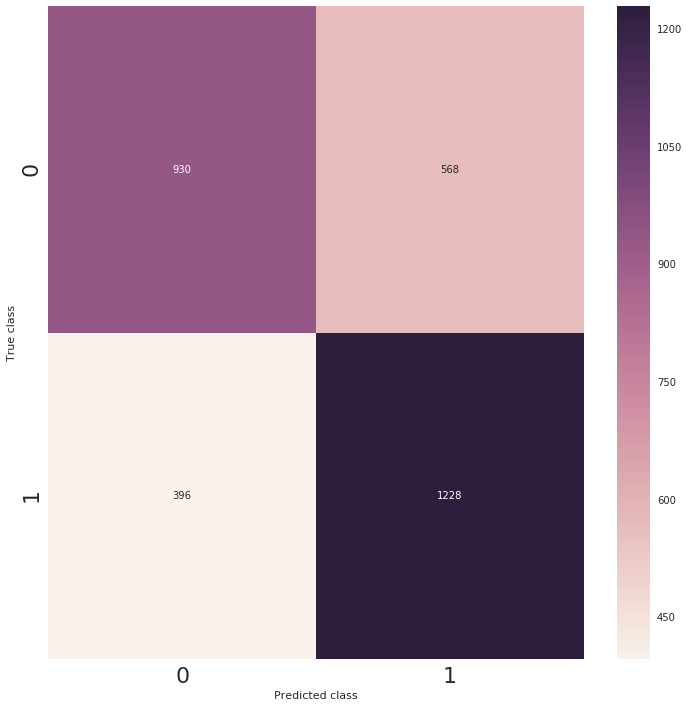

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize=22)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize=22)
#plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.savefig('confusionMatrix.png')